In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.listdir()

df = pd.read_excel('/content/Power BI Updated Data analyst Data (1).xlsx')
df.shape

(4894, 16)

In [ ]:
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [ ]:
df.info()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

,0
First Name,0
Email ID,0
Quantity,0
Events,0
Attendee Status,0
College Name,15
How did you come to know about this event?,2216
"Specify in ""Others"" (how did you come to know about this event)",4805
Designation,0
Year of Graduation,0


In [ ]:
def convert_income(val):
  val = str(val).lower()
  if "0-2" in val:
    return 1
  elif "2-5" in val:
    return 3.5
  elif "5-7" in val:
    return 6
  elif "7" in val:
    return 8
  else:
    return None

df["Family Income"] = df["Family Income"].apply(convert_income)

In [ ]:
df.isnull().sum()
df = df.drop_duplicates(subset='Email ID')

numeric_cols = [
    "Quantity","Year of Graduation","CGPA", "Experience with python (Months)", "Family Income", "Expected salary (Lac)"
]

for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["CGPA", "Expected salary (Lac)"])

**Q1. How many unique students?**

In [ ]:
unique_students = df["Email ID"].nunique()
print("Unique Students:", unique_students)

Unique Students: 2157


**Q2. Average CGPA**

In [ ]:
avg_gpa = df["CGPA"].mean()
print("Average CGPA:", round(avg_gpa,2))

Average CGPA: 8.03


**Q3.Distribution across Graduation Years**

In [ ]:
df["Year of Graduation"].value_counts().sort_index()

,count
Year of Graduation,
2023,676
2024,679
2025,565
2026,237


**Q4. Python Experience Distribution**

In [ ]:
df["Experience with python (Months)"].describe()

,Experience with python (Months)
count,2157.000000
mean,5.152990
std,1.581947
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,8.000000


**Q5.Average Family Income**

In [ ]:
round(df["Family Income"].mean(), 2)

np.float64(1.3)

**Q6. GPA by College(Top 5)**

In [ ]:
df.groupby("College Name")["CGPA"].mean().sort_values(ascending=False).head(5)

,CGPA
College Name,
St Xavier's College,8.795000
New horizon institute of Technology and Management,8.611765
"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",8.566667
AP SHAH INSTITUTE OF TECHNOLOGY,8.360000
"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]",8.325000


**Q7. Outliers in Quantity**

In [ ]:
q1 = df["Quantity"].quantile(0.25)
q3 =df["Quantity"].quantile(0.75)
iqr = q3-q1

outliers = df[(df["Quantity"] < q1 - 1.5*iqr) | (df["Quantity"] > q3 + 1.5*iqr)]
outliers.shape

(0, 16)

**Q8. GPA by City**

In [ ]:
df.groupby("City")["CGPA"].mean().sort_values(ascending=False)

,CGPA
City,
Delhi,9.014286
Raipur,8.980000
Sonipat,8.712500
konark,8.540000
Karnal,8.533333
...,...
Dhar,7.312500
Darbhanga,7.300000
New Delhi,7.142857


**Q9. Income vs CGPA Correlation**

In [ ]:
round(df["Family Income"].corr(df["CGPA"]), 3)

np.float64(0.018)

**Q10. Students from Each City (Graph)**

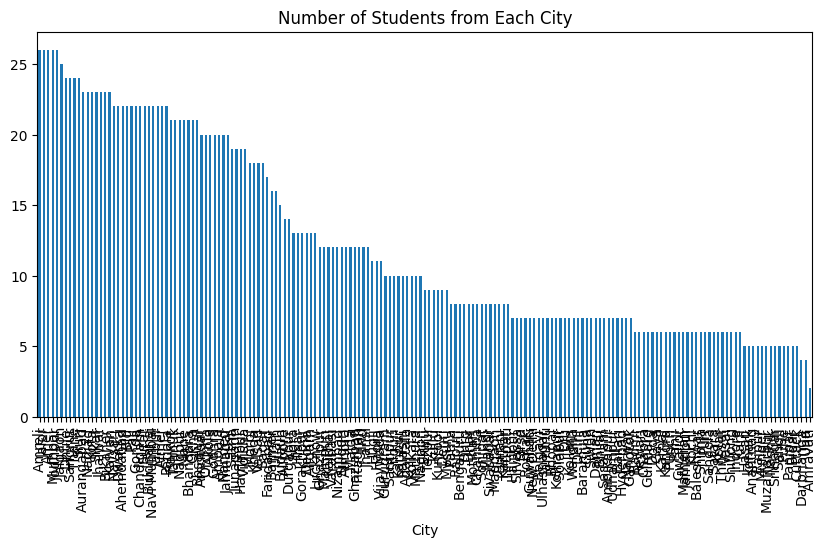

In [ ]:
import matplotlib.pyplot as plt

df["City"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Number of Students from Each City")
plt.show()

**Q11. Salary vs Factors**

**Salary vs CGPA**

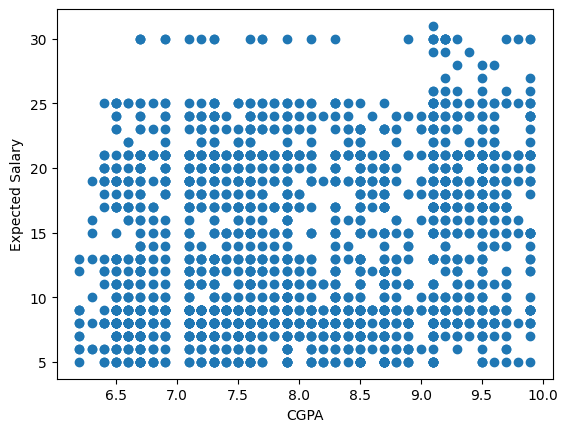

In [ ]:
plt.scatter(df["CGPA"], df["Expected salary (Lac)"])
plt.xlabel("CGPA")
plt.ylabel("Expected Salary")
plt.show()

**Salary vs Income**

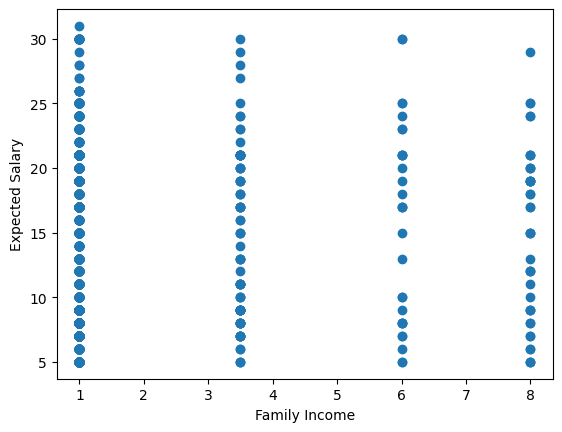

In [ ]:
plt.scatter(df["Family Income"], df["Expected salary (Lac)"])
plt.xlabel("Family Income")
plt.ylabel("Expected Salary")
plt.show()

**Salary vs Python Experience**

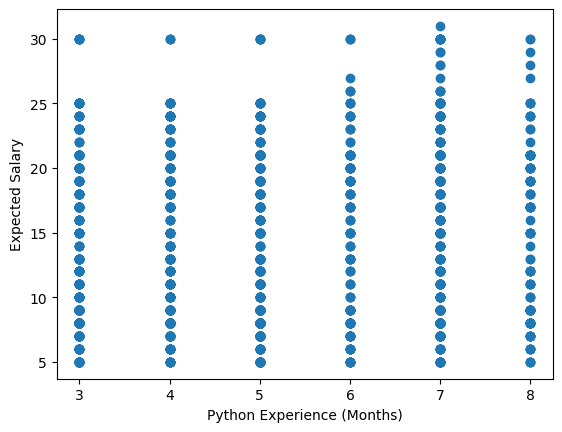

In [ ]:
plt.scatter(df["Experience with python (Months)"], df["Expected salary (Lac)"])
plt.xlabel("Python Experience (Months)")
plt.ylabel("Expected Salary")
plt.show()

**Q13. Leadership vs GPA & Salary**

In [ ]:
df.groupby("Leadership- skills")[["CGPA", "Expected salary (Lac)"]].mean()

,CGPA,Expected salary (Lac)
Leadership- skills,,
no,8.043339,13.620242
no,8.006061,14.272727
yes,8.012784,13.754261


**Q14. Students Graduating by End of 2024**

In [ ]:
df[df["Year of Graduation"] <= 2024].shape[0]

1355

**Q15. Which promotion channel brings in more student participation?**

In [ ]:
df["How did you come to know about this event?"].unique()

array(['Email', 'Others',
       'Instagram | LinkedIn | Cloud Counselage Website', 'Whatsapp',
       'LinkedIn', 'Cloud Counselage Website',
       'Instagram | Whatsapp | Email', 'Youtube', 'Instagram | Whatsapp',
       'Youtube | Whatsapp | Email', 'Facebook', 'Whatsapp | Others',
       'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email',
       'LinkedIn | Email | Cloud Counselage Website',
       'Youtube | Facebook | Instagram | Whatsapp | Email',
       'Email | Others', 'Whatsapp | Email',
       'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website',
       'Email | Cloud Counselage Website', 'Youtube | Whatsapp',
       'Facebook | Instagram', 'SPOC/ College Professor',
       'Whatsapp | SPOC/ College Professor',
       'Email | SPOC/ College Professor', 'Friend/ Classmate', 'Twitter',
       'LinkedIn | Email', 'LinkedIn | Whatsapp',
       'Instagram | LinkedIn | Email | Cloud Counselage Website',
       'Youtube | Facebook 

In [ ]:
promotion_counts = df["How did you come to know about this event?"].value_counts()
print(promotion_counts)

How did you come to know about this event?
Whatsapp                                                                                                 434
Email                                                                                                    227
Others                                                                                                    89
Cloud Counselage Website                                                                                  64
SPOC/ College Professor                                                                                   55
LinkedIn                                                                                                  27
Facebook                                                                                                  21
Youtube                                                                                                   17
Whatsapp | Email                                                                     

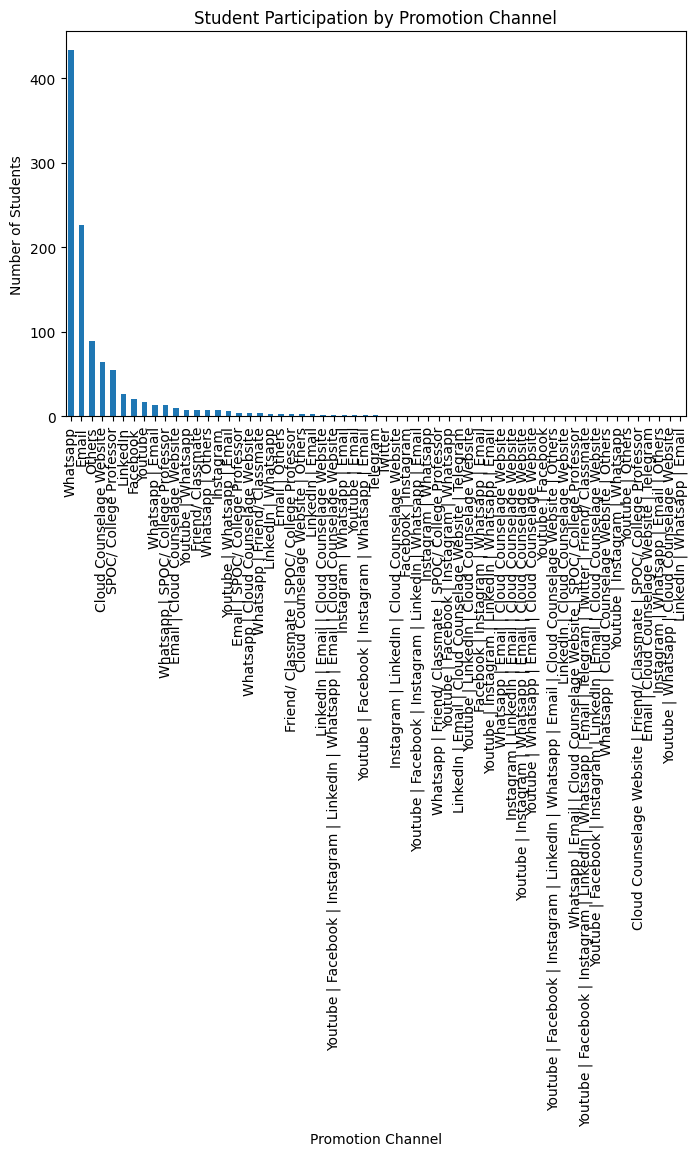

In [ ]:
import matplotlib.pyplot as plt

promotion_counts.plot(kind="bar", figsize=(8,5))
plt.title("Student Participation by Promotion Channel")
plt.xlabel("Promotion Channel")
plt.ylabel("Number of Students")
plt.show()

**Q16. Data Science Event Students**

In [ ]:
df[df["Events"].str.contains("Data", case=False, na=False)].shape[0]

225

**Q17. High CGPA + High Python → Salary**

In [ ]:
high = df[(df["CGPA"] >= 8) & (df["Experience with python (Months)"] >= 6)]
round(high["Expected salary (Lac)"].mean(), 2)


np.float64(16.35)